In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-04-03 10:50:22.708673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## Nordic Device-30 Own Models

## Nordic Device-30(i) dataset @2.4GHz

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/2.4GHz/Device-30(i)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.015625 +0.j        0.0234375+0.j        0.015625 +0.0078125j ...
 0.       +0.0078125j 0.0234375+0.j        0.0234375+0.j       ]
2048
96113
(2048, 96113)
[0.04646239 0.03328745 0.03656413 ... 0.02992783 0.0429942  0.0498788 ]
0
(10000, 2048)
(10000,)
[0.0078125-0.0078125j 0.       +0.015625j  0.03125  +0.j        ...
 0.015625 +0.j        0.0078125+0.j        0.0390625+0.015625j ]
2048
90115
(2048, 90115)
[0.02118785 0.01756276 0.02195976 ... 0.01779469 0.02509898 0.03127494]
1
(20000, 2048)
(20000,)
[0.015625 +0.j        0.0078125+0.0234375j 0.0234375+0.015625j  ...
 0.03125  +0.015625j  0.03125  +0.015625j  0.0078125+0.0078125j]
2048
77672
(2048, 77672)
[0.04712218 0.04057462 0.02913437 ... 0.02716755 0.03522654 0.03891793]
2
(30000, 2048)
(30000,)
[0.0234375+0.015625j  0.015625 +0.j        0.0234375+0.j        ...
 0.       +0.015625j  0.015625 +0.015625j  0.0234375-0.0078125j]
2048
73732
(2048, 73732)
[0.03594497 0.02562196 0.02509734 ... 0.01618464 0.01918358 0.03657822]
3
(40

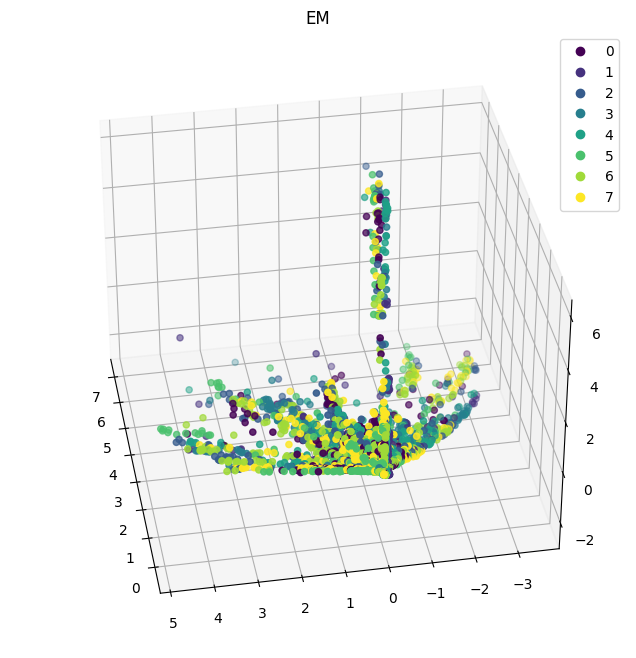

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(i)_scatter.pdf')

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

2023-04-02 14:48:09.930234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-

In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(i)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 24s 12ms/step - loss: 2.0689 - accuracy: 0.4828 - val_loss: 2.0598 - val_accuracy: 0.5840
Epoch 2/30
2025/2025 [==============================] - 21s 10ms/step - loss: 2.0469 - accuracy: 0.6418 - val_loss: 2.0317 - val_accuracy: 0.6907
Epoch 3/30
2025/2025 [==============================] - 20s 10ms/step - loss: 2.0081 - accuracy: 0.6947 - val_loss: 1.9799 - val_accuracy: 0.7018
Epoch 4/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.9308 - accuracy: 0.6951 - val_loss: 1.8667 - val_accuracy: 0.6872
Epoch 5/30
2025/2025 [==============================] - 22s 11ms/step - loss: 1.7555 - accuracy: 0.6526 - val_loss: 1.6194 - val_accuracy: 0.6765
Epoch 6/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.4753 - accuracy: 0.6723 - val_loss: 1.3371 - val_accuracy: 0.7558
Epoch 7/30
2025/2025 [==============================] - 20s 10ms/step - loss: 1.2275 - accuracy: 0.8043 - val_loss: 1.1198 -

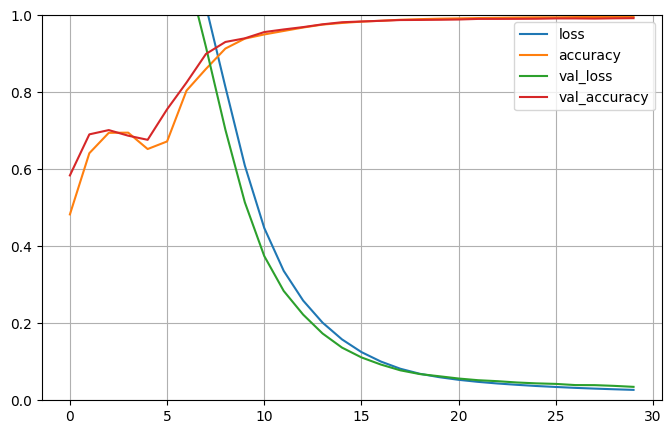

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [9]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(i)_model.h5")

In [10]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9929
test loss, test acc: [0.03180798515677452, 0.9928749799728394]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 921    0    2    0    0    4    0    0]
 [   0  997    0    0    0    0    2    0]
 [   2    0  970    1    0    3    0    3]
 [   1    0    0  968    2    1    4    0]
 [   0    0    1    7 1072    0    0    0]
 [   3    0    1    0    0 1011    0    1]
 [   9    0    2    5    0    1  998    0]
 [   0    0    0    0    0    2    0 1006]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       927
           1       1.00      1.00      1.00       999
           2       0.99      0.99      0.99       979
           3       0.99      0.99      0.99       976
           4       1.00      0.99      1.00      1080
           5       0.99      1.00      0.99      1016
           6       0.99      0.98      0.99      1015
           7       1.00      1.00      1.00      1008

    accuracy                           0.99      8000
   macro avg       0.99      0.99     

Test Accuracy:0.992875


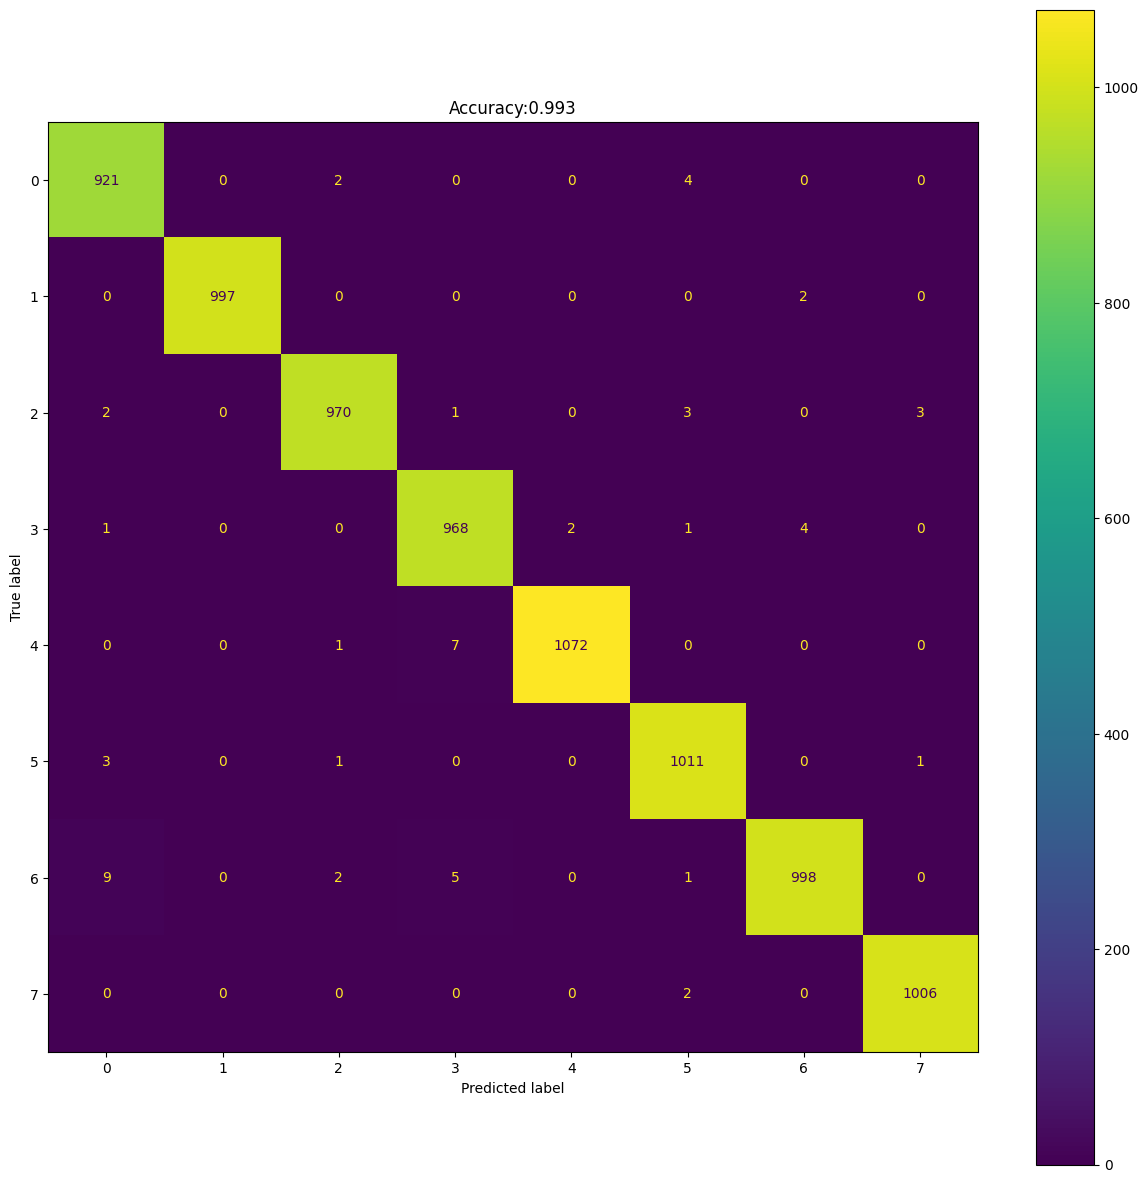

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/iNordic-30(i)_confusion_matrix.pdf')

## Nordic Device-30(ii) dataset @2.4GHZ

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/2.4GHz/Device-30(ii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.0234375+0.j        0.015625 +0.0078125j 0.015625 +0.j        ...
 0.03125  -0.0078125j 0.       +0.0078125j 0.0234375+0.j       ]
2048
84921
(2048, 84921)
[0.04259191 0.03362997 0.02526437 ... 0.02303903 0.02592443 0.03146292]
0
(10000, 2048)
(10000,)
[0.0234375+0.0234375j 0.03125  -0.0078125j 0.03125  +0.015625j  ...
 0.0078125+0.j        0.       +0.0078125j 0.015625 -0.015625j ]
2048
90846
(2048, 90846)
[0.02672957 0.01999211 0.01750226 ... 0.01990294 0.01985274 0.01860477]
1
(20000, 2048)
(20000,)
[ 0.015625 +0.j         0.0234375+0.0078125j  0.015625 +0.j        ...
 -0.0078125-0.0078125j  0.03125  -0.0078125j  0.0234375+0.0234375j]
2048
84482
(2048, 84482)
[0.05417342 0.04321303 0.04044964 ... 0.036244   0.04203677 0.04316486]
2
(30000, 2048)
(30000,)
[ 0.0390625-0.0078125j  0.015625 +0.j         0.0078125+0.j        ...
 -0.0078125+0.0078125j  0.0078125+0.j         0.       +0.0234375j]
2048
83385
(2048, 83385)
[0.02831035 0.02287704 0.01580978 ... 0.01231729 0.01352889 0.020

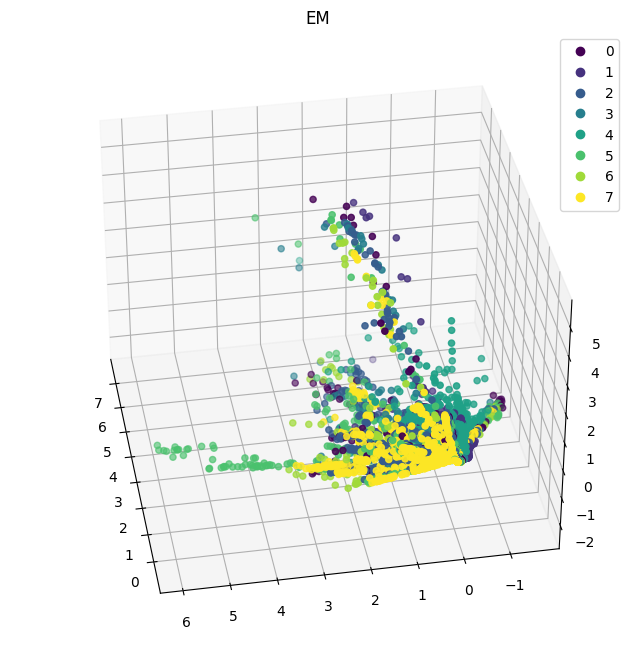

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(ii)_scatter.pdf')

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     


2023-04-03 10:59:44.881105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("//Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 21s 10ms/step - loss: 2.0653 - accuracy: 0.2513 - val_loss: 2.0501 - val_accuracy: 0.2783
Epoch 2/30
2025/2025 [==============================] - 19s 10ms/step - loss: 2.0279 - accuracy: 0.4022 - val_loss: 2.0009 - val_accuracy: 0.4710
Epoch 3/30
2025/2025 [==============================] - 19s 9ms/step - loss: 1.9481 - accuracy: 0.4902 - val_loss: 1.8791 - val_accuracy: 0.4806
Epoch 4/30
2025/2025 [==============================] - 20s 10ms/step - loss: 1.7467 - accuracy: 0.4921 - val_loss: 1.5999 - val_accuracy: 0.4819
Epoch 5/30
2025/2025 [==============================] - 18s 9ms/step - loss: 1.4438 - accuracy: 0.6125 - val_loss: 1.2997 - val_accuracy: 0.7292
Epoch 6/30
2025/2025 [==============================] - 19s 9ms/step - loss: 1.1583 - accuracy: 0.8145 - val_loss: 1.0300 - val_accuracy: 0.9074
Epoch 7/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.9151 - accuracy: 0.9427 - val_loss: 0.8053 - val

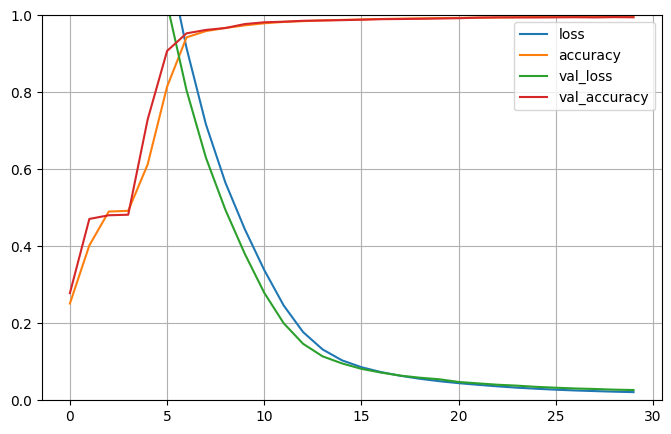

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(ii)_model.h5")

In [10]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9955
test loss, test acc: [0.026595911011099815, 0.9955000281333923]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 923    0    1    0    1    1    1    0]
 [   0  994    0    2    2    1    0    0]
 [   0    0  970    0    1    2    3    3]
 [   1    1    0  974    0    0    0    0]
 [   1    0    0    0 1079    0    0    0]
 [   0    0    3    0    0 1012    0    1]
 [   3    0    2    0    0    2 1008    0]
 [   0    0    4    0    0    0    0 1004]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       927
           1       1.00      0.99      1.00       999
           2       0.99      0.99      0.99       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       0.99      1.00      1.00      1016
           6       1.00      0.99      0.99      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.9955


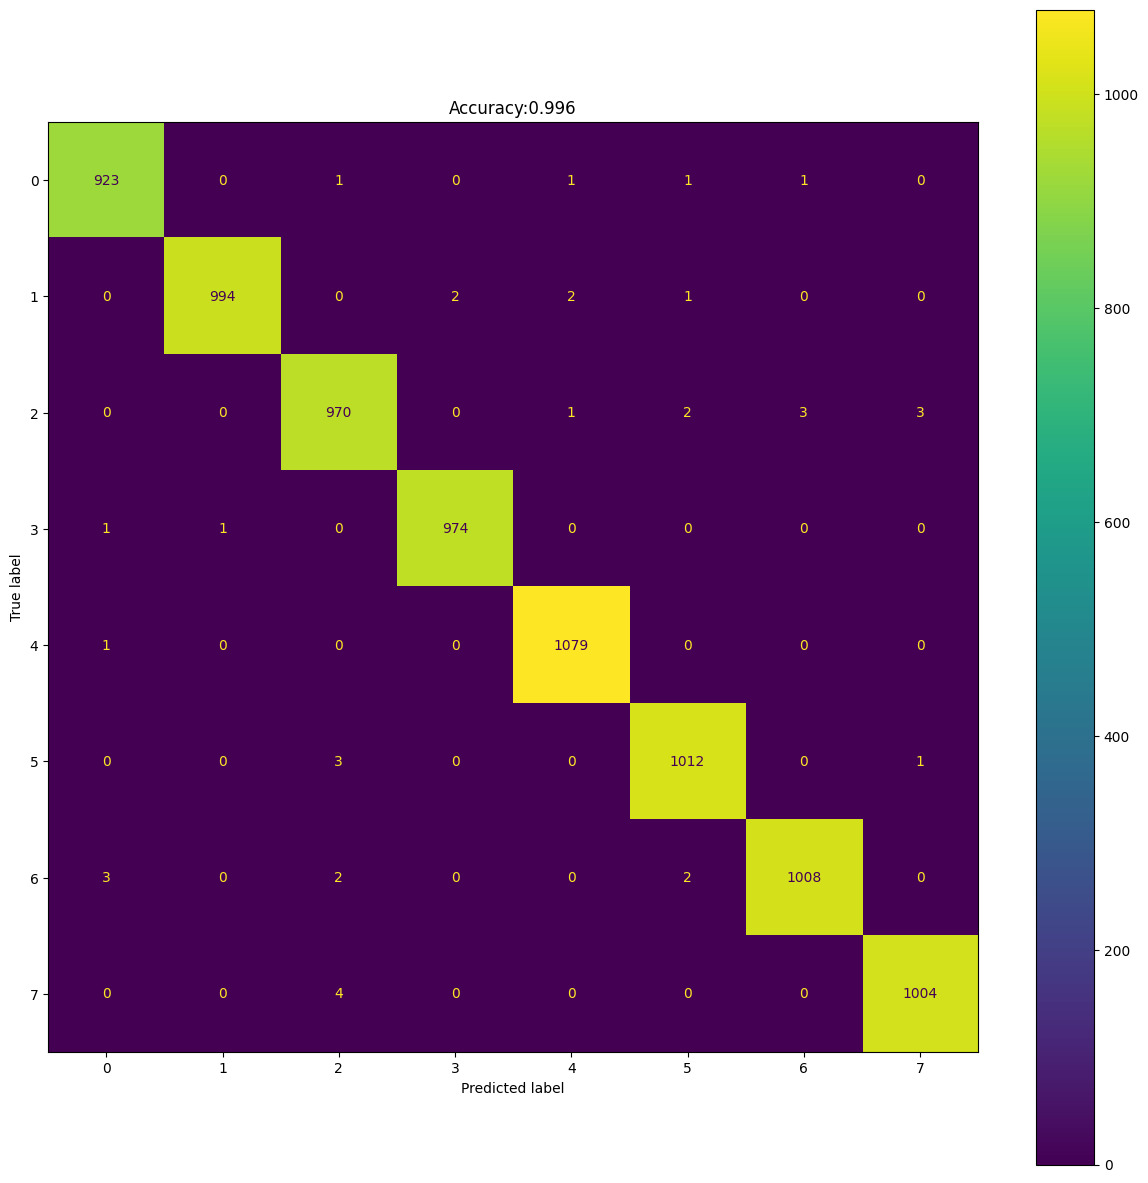

In [12]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/iNordic-30(ii)_confusion_matrix.pdf')

## Nordic Device-30(iii) dataset @2.4GHZ

In [13]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/2.4GHz/Device-30(iii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[-0.015625 +0.j         0.0234375+0.0078125j  0.0078125+0.j        ...
  0.       +0.0234375j  0.03125  +0.0078125j  0.015625 +0.0078125j]
2048
86010
(2048, 86010)
[0.02965036 0.02421156 0.01498892 ... 0.01784609 0.01751189 0.02130463]
0
(10000, 2048)
(10000,)
[-0.0234375+0.0234375j  0.       -0.0390625j  0.0234375+0.015625j  ...
  0.015625 +0.0234375j  0.0078125+0.015625j   0.0234375+0.0078125j]
2048
78192
(2048, 78192)
[0.02501178 0.02254374 0.02445342 ... 0.01480449 0.01424241 0.0179573 ]
1
(20000, 2048)
(20000,)
[0.015625 +0.j        0.0078125+0.0078125j 0.0078125+0.j        ...
 0.0234375+0.015625j  0.0078125+0.0234375j 0.0078125-0.0234375j]
2048
77681
(2048, 77681)
[0.03295958 0.02481395 0.01668315 ... 0.01402689 0.01567082 0.02230988]
2
(30000, 2048)
(30000,)
[ 0.       +0.015625j   0.       +0.j        -0.015625 +0.015625j  ...
  0.0078125+0.015625j   0.046875 +0.0078125j -0.0078125+0.j       ]
2048
97136
(2048, 97136)
[0.0352106  0.02555366 0.0206623  ... 0.01964847 0.02377083

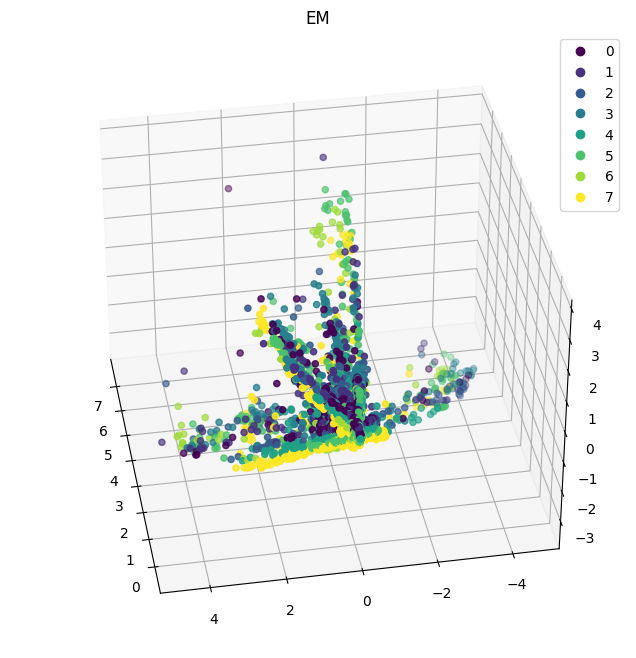

In [14]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_scatter.pdf')

In [15]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [17]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("//Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 19s 9ms/step - loss: 2.0694 - accuracy: 0.2267 - val_loss: 2.0601 - val_accuracy: 0.5547
Epoch 2/30
2025/2025 [==============================] - 18s 9ms/step - loss: 2.0490 - accuracy: 0.5242 - val_loss: 2.0364 - val_accuracy: 0.5403
Epoch 3/30
2025/2025 [==============================] - 27s 13ms/step - loss: 2.0190 - accuracy: 0.5782 - val_loss: 1.9983 - val_accuracy: 0.5113
Epoch 4/30
2025/2025 [==============================] - 23s 11ms/step - loss: 1.9661 - accuracy: 0.5043 - val_loss: 1.9246 - val_accuracy: 0.4919
Epoch 5/30
2025/2025 [==============================] - 24s 12ms/step - loss: 1.8530 - accuracy: 0.4596 - val_loss: 1.7562 - val_accuracy: 0.4638
Epoch 6/30
2025/2025 [==============================] - 28s 14ms/step - loss: 1.5986 - accuracy: 0.5312 - val_loss: 1.4070 - val_accuracy: 0.6560
Epoch 7/30
2025/2025 [==============================] - 23s 11ms/step - loss: 1.1784 - accuracy: 0.8294 - val_loss: 0.9395 - v

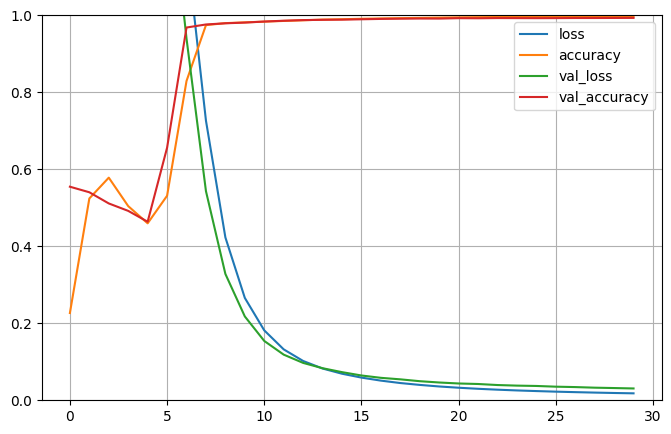

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_model.h5")

In [20]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9951
test loss, test acc: [0.021724781021475792, 0.9951249957084656]


In [21]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 921    3    2    1    0    0    0    0]
 [   0  998    0    0    1    0    0    0]
 [   0    1  975    0    0    3    0    0]
 [   3    0    4  966    0    3    0    0]
 [   0    1    0    0 1079    0    0    0]
 [   0    0    3    3    0 1006    0    4]
 [   0    0    0    0    1    0 1014    0]
 [   0    0    0    1    0    4    1 1002]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       927
           1       1.00      1.00      1.00       999
           2       0.99      1.00      0.99       979
           3       0.99      0.99      0.99       976
           4       1.00      1.00      1.00      1080
           5       0.99      0.99      0.99      1016
           6       1.00      1.00      1.00      1015
           7       1.00      0.99      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.995125


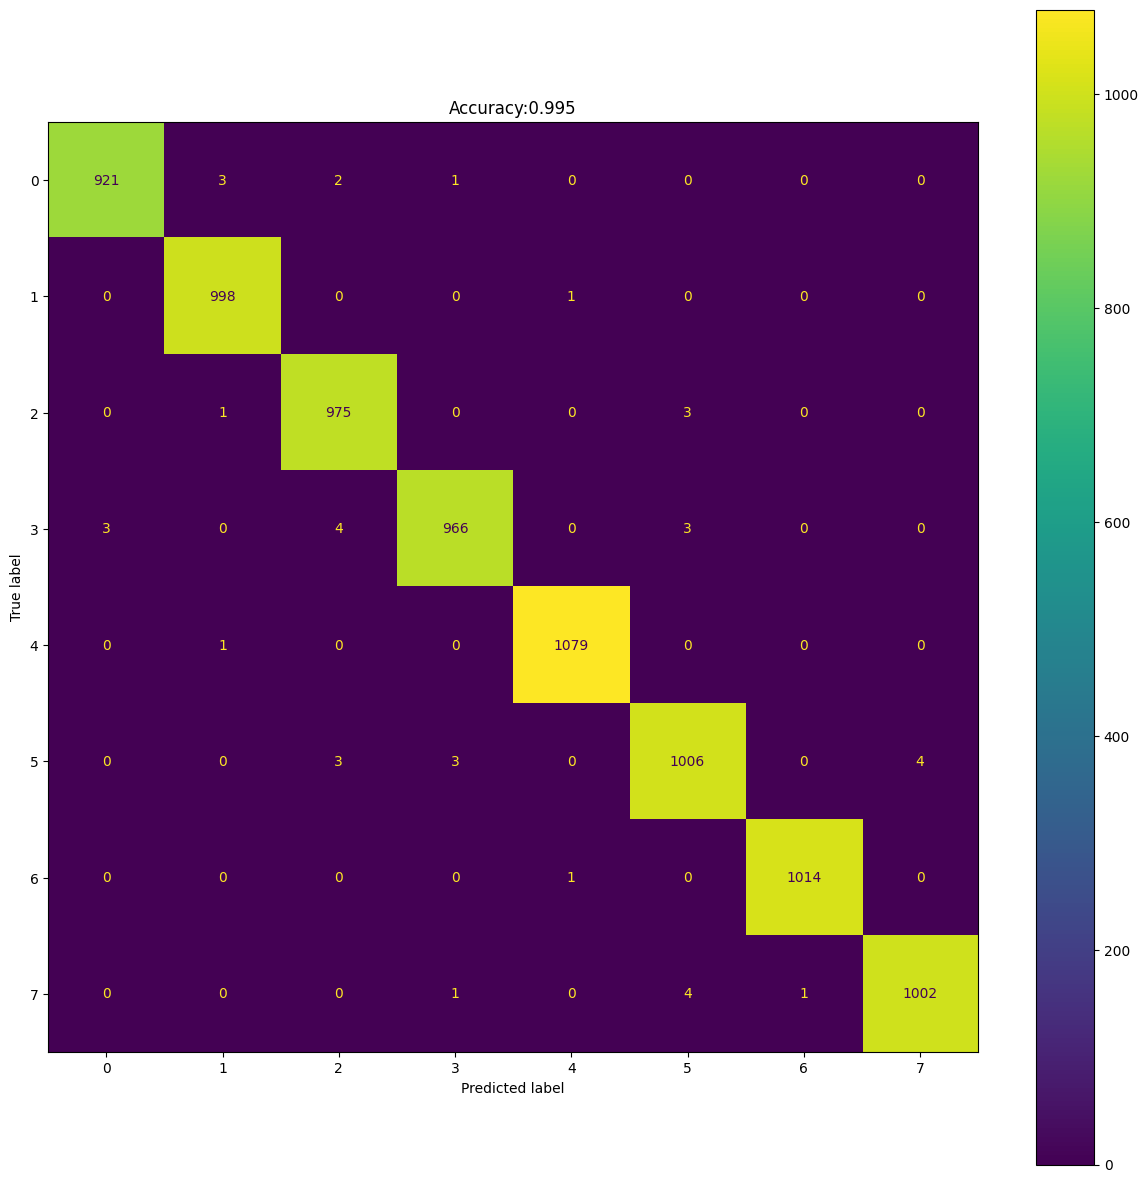

In [22]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/2.4GHz/Device-30/Nordic-device-30-Own_models/iNordic-30(iii)_confusion_matrix.pdf')